12.4a,b

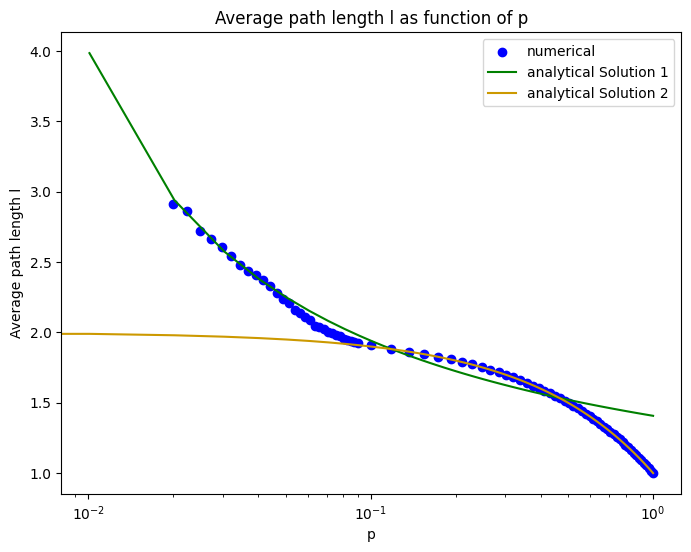

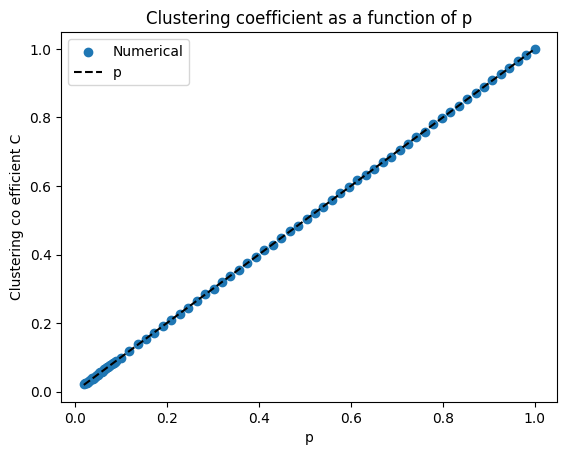

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import random
import matplotlib.ticker as ticker


n=500
p_list1= np.linspace(0.02,0.09,30)
p_list2= np.linspace(0.1, 1, 50)

p_list = np.concatenate((p_list1, p_list2))

# p_list=[0.05,0.5,0.6]
def compute_average_path_l (a):
    length =0
    for i in range(n):
        for j in range(n):
            if i!=j:
                length+= a[i][j]
    length= length/(n**2-n)
    return length


def analyticalvalue_1(n, p):
    gamma = 0.57722
    numerator = np.log(n) - gamma
    
    denominator = np.log(p * (n - 1)) if p * (n - 1) > 0 else np.nan
    
    l = (numerator / denominator) + 0.5
    return l

def analyticalvalue_2(p):
    return 2-p

def check_for_off_diagonal_terms1(a):
    n = len(a)  # Assuming 'n' is defined somewhere before this function is called
    for i in range(n):
        for j in range(n):
            if i != j and a[i][j] == -1:
                return True  # Return True if any off-diagonal element is -1
    return False

def calculate_clustering_coefficient(adjacency_matrix):
    n = len(adjacency_matrix)

    a_cube = np.matmul(np.matmul(adjacency_matrix, adjacency_matrix), adjacency_matrix)
    closed_triangles = np.trace(a_cube)

    degrees = np.sum(adjacency_matrix, axis=0)

    all_triangles = np.sum(np.square(degrees) - degrees)

    clustering_coefficient = closed_triangles / all_triangles if all_triangles > 0 else 0.0

    return clustering_coefficient


average_length_list=[]
c_list=[]
for p in p_list:

    amatrix = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i>j:
                x= random.random()
                if x< p:
                    amatrix[i][j]= 1
                    amatrix[j][i]=1
    degree= np.zeros((n,1))
    c_list.append(calculate_clustering_coefficient(amatrix))
    for i in range(n):
        degree[i,:] = np.sum(amatrix[i,:])

    l = np.full((n,n),-1)
    t=1               
    int_a = amatrix

    while check_for_off_diagonal_terms1(l):
        for i in range(n):
            for j in range(i+1,n):
                if amatrix[i,j]!=0:
                    if l[i,j]==l[j,i]==-1:
                        l[i,j]=t
                        l[j,i]=t

            
        amatrix=np.dot(amatrix,int_a)
        t+=1
        # print(p, t)
    average_length_list.append(compute_average_path_l(l))
dark_yellow = (0.8, 0.6, 0)

p_ana= np.linspace(0,1,100)
analyticalvalue_1_list=[]
analyticalvalue_2_list=[]
for p in p_ana:
    analyticalvalue_1_list.append(analyticalvalue_1(n,p)) 
    analyticalvalue_2_list.append(analyticalvalue_2(p))

plt.figure(figsize=(8, 6)) 
plt.scatter(p_list, average_length_list, label='numerical', color='blue')
plt.semilogx(p_ana,analyticalvalue_1_list, label='analytical Solution 1', color= 'green')
plt.semilogx(p_ana, analyticalvalue_2_list, label= 'analytical Solution 2', color=dark_yellow)
plt.legend()
# plt.xlim(0.01, 1)
# plt.ylim(0.01,3.9)
plt.xlabel('p')
plt.ylabel('Average path length l')
plt.title('Average path length l as function of p')
plt.show()

plt.scatter(p_list,c_list, label='Numerical')
plt.plot(p_list, p_list, label='p', linestyle='dashed', color='black')
plt.legend()
plt.xlabel('p')
plt.ylabel('Clustering co efficient C')
plt.title('Clustering coefficient as a function of p')
plt.show()

